In [141]:
# numpy, scipy, pandasのインポート
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame
# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
# 機械学習ライブラリ
import sklearn
# 小数第3位まで表示
%precision 3

# mglearnのインポート
import mglearn
from sklearn.datasets import make_blobs

In [142]:
import warnings
warnings.filterwarnings('ignore')

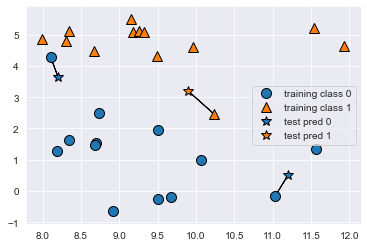

In [143]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

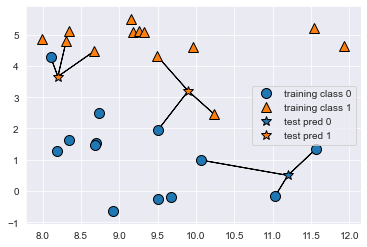

In [144]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [145]:
X, y = mglearn.datasets.make_forge()

In [146]:
X

array([[ 9.963,  4.597],
       [11.033, -0.168],
       [11.542,  5.211],
       [ 8.693,  1.543],
       [ 8.106,  4.287],
       [ 8.31 ,  4.806],
       [11.93 ,  4.649],
       [ 9.673, -0.203],
       [ 8.348,  5.134],
       [ 8.675,  4.476],
       [ 9.177,  5.093],
       [10.24 ,  2.455],
       [ 8.689,  1.487],
       [ 8.922, -0.64 ],
       [ 9.491,  4.332],
       [ 9.257,  5.133],
       [ 7.998,  4.853],
       [ 8.184,  1.296],
       [ 8.734,  2.492],
       [ 9.323,  5.098],
       [10.064,  0.991],
       [ 9.5  , -0.264],
       [ 8.345,  1.638],
       [ 9.502,  1.938],
       [ 9.151,  5.498],
       [11.564,  1.339]])

In [147]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [148]:
X.shape

(26, 2)

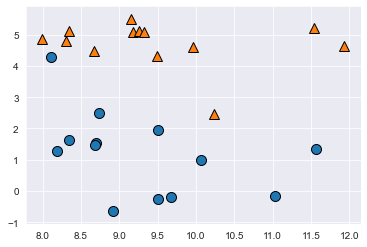

In [149]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [150]:
#k-NN用クラス
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [151]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [152]:
model.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [153]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

In [154]:
model.predict(X_test)==y_test

array([ True,  True,  True,  True,  True, False,  True])

In [155]:
model.score(X_test, y_test)

0.857

In [156]:
model18 = KNeighborsClassifier(n_neighbors=18)
model18.fit(X_train, y_train)
model18.score(X_test, y_test)

0.429

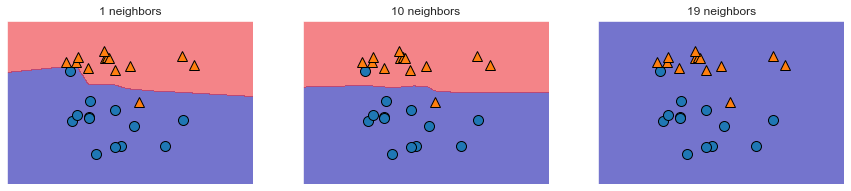

In [157]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
for n_neighbors, ax in zip([1, 10, 19], axes):
    model = KNeighborsClassifier(n_neighbors = n_neighbors). fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(model, X, fill = True, ax = ax, alpha = 0.5)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{} neighbors" .format(n_neighbors))

plt.show()

In [158]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [159]:
cancer.data.shape

(569, 30)

In [160]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

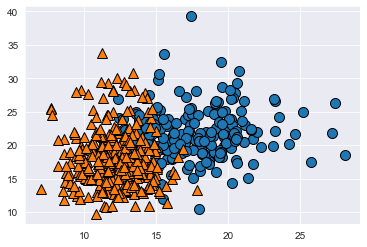

In [161]:
mglearn.discrete_scatter(cancer.data[:, 0], cancer.data[:, 1], cancer.target)

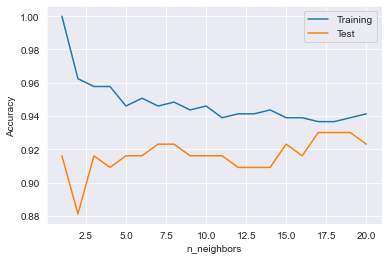

In [162]:
# 訓練データとテストデータに分ける
# stratifyは層化別抽出
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, stratify = cancer.target, random_state=0)
# グラフ描画用のリストを用意
training_accuracy = []
test_accuracy =[]
# 学習
for n_neighbors in range(1,21):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train,y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))
# グラフを描画
plt.plot(range(1,21), training_accuracy, label='Training')
plt.plot(range(1,21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [163]:
# インポート
import requests, zipfile
import io
# データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content
# 取得したデータをDataFrameオブジェクトとして読み込み
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
# データの列にラベルを設定
mushroom.columns = ['classes','cap_shape','cap_surface','cap_color','odor','bruises','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape', 'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring', 'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color', 'ring_number','ring_type','spore_print_color', 'population','habitat']

In [164]:
# 先頭5行を表示
mushroom.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [165]:
print('データの形式:{}'.format(mushroom.shape))
print('欠損の数:{}'.format(mushroom.isnull().sum().sum()))

データの形式:(8124, 23)
欠損の数:0


In [166]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x =='p' else 0)

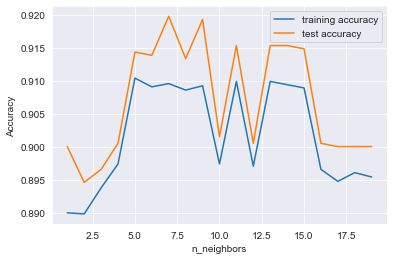

In [167]:
# 解答
from sklearn.neighbors import KNeighborsClassifier
# 説明変数と目的変数
X = mushroom_dummy.drop('flg', axis=1)
y = mushroom_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
training_accuracy = []
test_accuracy =[]
neighbors_settings = range(1,20)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [168]:
# SVMのライブラリ
from sklearn.svm import LinearSVC
# 訓練データとテストデータを分けるライブラリ
from sklearn.model_selection import train_test_split
# データの読み込み
cancer = load_breast_cancer()
# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify = cancer.target, random_state=0)
# クラスの初期化と学習
model = LinearSVC()
model.fit(X_train,y_train)
# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.934
正解率(test):0.916


In [169]:
from sklearn.preprocessing import StandardScaler

# データの読み込み
cancer = load_breast_cancer()
# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify = cancer.target, random_state=0)
# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
# クラスの初期化と学習
model = LinearSVC()
model.fit(X_train_std,y_train)
# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.993
正解率(test):0.951
